   # Artificial Neural Network with Pytorch 
   
   - Developed by **Armin Norouzi**
   - Compatible with Google Colaboratory- Pytorch version 1.12.1+cu113

   
   - **Objective:** Start working with Pytorch from simple example to real-world problem
   
   
Table of content: 



## Linear Regression with PyTorch

In this section we'll use PyTorch's machine learning model to progressively develop a best-fit line for a given set of data points. Like most linear regression algorithms, we're seeking to minimize the error between our model and the actual data, using a <em>loss function</em> like mean-squared-error.

![img](https://upload.wikimedia.org/wikipedia/commons/e/ed/Residuals_for_Linear_Regression_Fit.png)

Image source: <a href='https://commons.wikimedia.org/wiki/File:Residuals_for_Linear_Regression_Fit.png'>https://commons.wikimedia.org/wiki/File:Residuals_for_Linear_Regression_Fit.png</a>

To start, we'll develop a collection of data points that appear random, but that fit a known linear equation $y = 2x+1$

- Importing libraries

In [1]:
import torch
print(torch.__version__)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

# to avoid writing torch.nn
import torch.nn as nn

1.12.1+cu113


### Create data

- create x using linspace and reshape it to -1 to 1 to make it column value

In [2]:
X = torch.linspace(1,50,50).reshape(-1,1)


- Generating output value using random function

In [3]:
torch.manual_seed(71) # to obtain reproducible results
e = torch.randint(-8,9,(50,1),dtype=torch.float)

# adding noise to make our data noisy for modeling
y = 2*X + 1 + e
print(f"X shape is {X.shape} and y shape is {y.shape}")

X shape is torch.Size([50, 1]) and y shape is torch.Size([50, 1])


- Plotting data

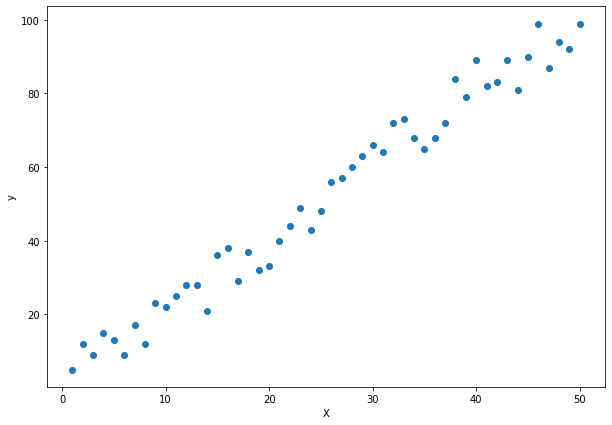

In [4]:
# we cannot plot tensor from torch so we need to convert it to numpy array
plt.figure(figsize=(10, 7))
plt.scatter(X.numpy(), y.numpy())
plt.xlabel('X')
plt.ylabel('y')
plt.show();

### Simple linear model
As a quick demonstration we'll show how the built-in <tt>nn.Linear()</tt> model preselects weight and bias values at random.

In [5]:
# To set a seed in order to get exact same value everytime we run the cell
torch.manual_seed(59)

model = nn.Linear(in_features=1, out_features=1)


print(model.weight)
print(model.bias)

Parameter containing:
tensor([[0.1060]], requires_grad=True)
Parameter containing:
tensor([0.9638], requires_grad=True)


Without seeing any data, the model sets a random weight of 0.1060 and a bias of 0.9638.

### Model classes
PyTorch lets us define models as object classes that can store multiple model layers. In upcoming sections we'll set up several neural network layers, and determine how each layer should perform its forward pass to the next layer. For now, though, we only need a single <tt>linear</tt> layer.

In [6]:
class Model(nn.Module):
    def __init__(self, in_features, out_features):
        super().__init__()
        self.linear = nn.Linear(in_features, out_features)
        
    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred

**Note:** The "Linear" model layer used here doesn't really refer to linear regression. Instead, it describes the type of neural network layer employed. Linear layers are also called "fully connected" or "dense" layers. Going forward our models may contain linear layers, convolutional layers, and more.

When <tt>Model</tt> is instantiated, we need to pass in the size (dimensions) of the incoming and outgoing features. For our purposes we'll use (1,1).<br>As above, we can see the initial hyperparameters.

In [7]:
torch.manual_seed(59)
model = Model(1, 1)
print(model)
print('Weight:', model.linear.weight.item())
print('Bias:  ', model.linear.bias.item())

Model(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)
Weight: 0.10597813129425049
Bias:   0.9637961387634277


As models become more complex, it may be better to iterate over all the model parameters:

In [8]:
for name, param in model.named_parameters():
    print(name, '\t', param.item())

linear.weight 	 0.10597813129425049
linear.bias 	 0.9637961387634277


This is just a random wights and biases as we did not train the model

### Set the loss function
We could write our own function to apply a Mean Squared Error (MSE) that follows<br>

$\begin{split}MSE &= \frac {1} {n} \sum_{i=1}^n {(y_i - \hat y_i)}^2 \\
&= \frac {1} {n} \sum_{i=1}^n {(y_i - (wx_i + b))}^2\end{split}$<br>

Fortunately PyTorch has it built in.<br>
<em>By convention, you'll see the variable name "criterion" used, but feel free to use something like "linear_loss_func" if that's clearer.</em>

In [9]:
criterion = nn.MSELoss()

### Set the optimization
Here we'll use <a href='https://en.wikipedia.org/wiki/Stochastic_gradient_descent'>Stochastic Gradient Descent</a> (SGD) with an applied <a href='https://en.wikipedia.org/wiki/Learning_rate'>learning rate</a> (lr) of 0.001. Recall that the learning rate tells the optimizer how much to adjust each parameter on the next round of calculations. Too large a step and we run the risk of overshooting the minimum, causing the algorithm to diverge. Too small and it will take a long time to converge.

For more complicated (multivariate) data, you might also consider passing optional <a href='https://en.wikipedia.org/wiki/Stochastic_gradient_descent#Momentum'><tt>momentum</tt></a> and <a href='https://en.wikipedia.org/wiki/Tikhonov_regularization'><tt>weight_decay</tt></a> arguments. Momentum allows the algorithm to "roll over" small bumps to avoid local minima that can cause convergence too soon. Weight decay (also called an L2 penalty) applies to biases.

For more information, see <a href='https://pytorch.org/docs/stable/optim.html'><strong><tt>torch.optim</tt></strong></a>

In [10]:
optimizer = torch.optim.SGD(model.parameters(), lr= 0.001)

### Train the model
An <em>epoch</em> is a single pass through the entire dataset. We want to pick a sufficiently large number of epochs to reach a plateau close to our known parameters of $\mathrm {weight} = 2,\; \mathrm {bias} = 1$

In [11]:
# Set a reasonably large number of passes
epochs = 50

# Create a list to store loss values. This will let us view our progress afterward.
losses = []

for i in range(epochs):
    i += 1

    # Create a prediction set by running "X" through the current model parameters
    y_pred = model.forward(X) 

    # claculating loss function
    loss = criterion(y_pred, y) 

    # Add the loss value to our tracking list
    # as loss coming from criterion we need to detach it and converted it to numpy
    # array in order to plot it later
    losses.append(loss.detach().numpy())

    # Print the current line of results 
    print(f'epoch: {i:2}  loss: {loss.item():10.8f} \
          weight: {model.linear.weight.item():10.8f}  \
          bias: {model.linear.bias.item():10.8f}') 
    
    # Gradients accumulate with every backprop. To prevent compounding we need 
    # to reset the stored gradient for each new epoch.
    optimizer.zero_grad()

    # Now we can backprop
    loss.backward()

    # Finally, we can update the hyperparameters of our model
    optimizer.step()

epoch:  1  loss: 3057.21679688           weight: 0.10597813            bias: 0.96379614
epoch:  2  loss: 1588.53112793           weight: 3.33490038            bias: 1.06046367
epoch:  3  loss: 830.30029297           weight: 1.01483262            bias: 0.99226284
epoch:  4  loss: 438.85241699           weight: 2.68179965            bias: 1.04252183
epoch:  5  loss: 236.76152039           weight: 1.48402119            bias: 1.00766504
epoch:  6  loss: 132.42912292           weight: 2.34460592            bias: 1.03396463
epoch:  7  loss: 78.56572723           weight: 1.72622538            bias: 1.01632178
epoch:  8  loss: 50.75775909           weight: 2.17050409            bias: 1.03025162
epoch:  9  loss: 36.40123367           weight: 1.85124576            bias: 1.02149546
epoch: 10  loss: 28.98922920           weight: 2.08060074            bias: 1.02903891
epoch: 11  loss: 25.16238213           weight: 1.91576838            bias: 1.02487016
epoch: 12  loss: 23.18647385           weight:

### Plot the loss values
Let's see how loss changed over time

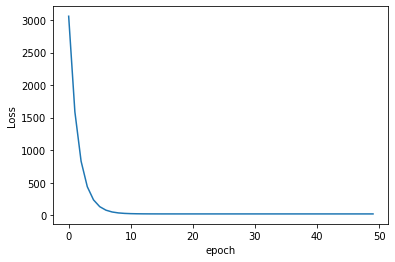

In [12]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epoch');

### Plot the result
Now we'll derive <tt>y1</tt> from the new model to plot the most recent best-fit line.

In [13]:
w1,b1 = model.linear.weight.item(), model.linear.bias.item()
print(f'Current weight: {w1:.8f}, Current bias: {b1:.8f}')
print()

x1 = np.array([X.min(),X.max()]) 

y1 = x1*w1 + b1

Current weight: 1.98381913, Current bias: 1.05575156



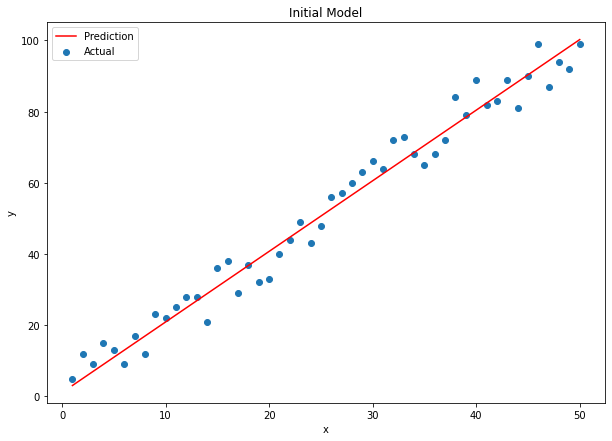

In [14]:
plt.figure(figsize=(10, 7))

plt.scatter(X.numpy(), y.numpy(), label = "Actual")
plt.plot(x1,y1,'r', label = "Prediction")
plt.title('Initial Model')
plt.ylabel('y')
plt.xlabel('x')
plt.legend()
plt.show();

Great job! Model is ready!

## Neural network model using Pytorch


### Loading iris dataset

Here we'll load the iris flower dataset using `sklearn.datasets` and converted to pandas dataframe

In [15]:
import pandas as pd

from sklearn.datasets import load_iris

iris = load_iris()
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

In [16]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


### Visualizing dataset

The iris dataset has 4 features. To get an idea how they correlate we can plot four different relationships among them.<br>
We'll use the index positions of the columns to grab their names in pairs with <tt>plots = [(0,1),(2,3),(0,2),(1,3)]</tt>.<br>
Here <tt>(0,1)</tt> sets "sepal length (cm)" as <tt>x</tt> and "sepal width (cm)" as <tt>y</tt>

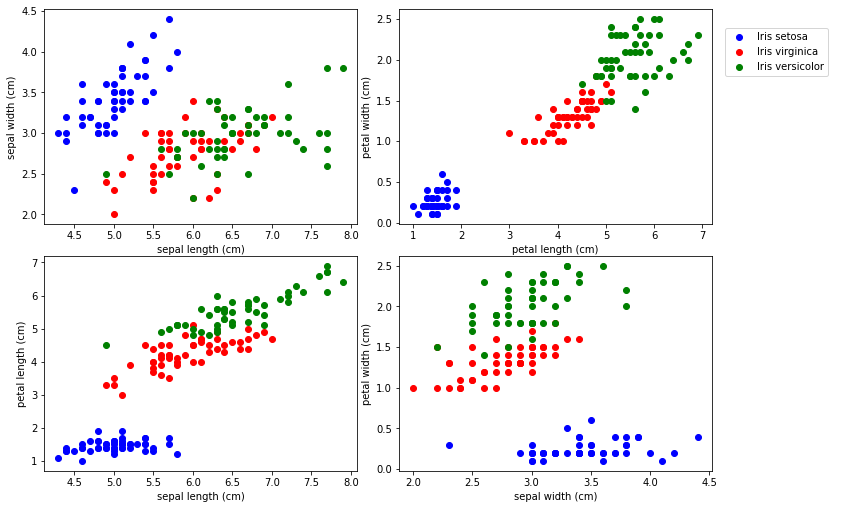

In [17]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,7))
fig.tight_layout()

plots = [(0,1),(2,3),(0,2),(1,3)]
colors = ['b', 'r', 'g']
labels = ['Iris setosa','Iris virginica','Iris versicolor']

for i, ax in enumerate(axes.flat):
    for j in range(3):
        x = df.columns[plots[i][0]]
        y = df.columns[plots[i][1]]
        ax.scatter(df[df['target']==j][x], df[df['target']==j][y], color=colors[j])
        ax.set(xlabel=x, ylabel=y)

fig.legend(labels=labels, loc=3, bbox_to_anchor=(1.0,0.85))
plt.show()

The iris dataset consists of 50 samples each from three species of Iris (<em>Iris setosa</em>, <em>Iris virginica</em> and <em>Iris versicolor</em>), for 150 total samples. We have four features (sepal length & width, petal length & width) and three unique labels:
0. <em>Iris setosa</em>
1. <em>Iris virginica</em>
2. <em>Iris versicolor</em>

### The classic method for building train/test split tensors
Before introducing PyTorch's Dataset and DataLoader classes, we'll take a quick look at the alternative.

In [37]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(df.drop('target',axis=1).values,
                                                    df['target'].values, test_size=0.2,
                                                    random_state=33)

# Casting traina and test data set to pytorch tensor
X_train = torch.FloatTensor(train_X)
X_test = torch.FloatTensor(test_X)
# y_train = F.one_hot(torch.LongTensor(y_train))  # not needed with Cross Entropy Loss
# y_test = F.one_hot(torch.LongTensor(y_test))
y_train = torch.LongTensor(train_y) 
y_test = torch.LongTensor(test_y)

In [38]:
print(f'Training size: {len(y_train)}')
labels, counts = y_train.unique(return_counts=True)
print(f'Labels: {labels}\nCounts: {counts}')

Training size: 120
Labels: tensor([0, 1, 2])
Counts: tensor([42, 42, 36])


### Using PyTorch's Dataset and DataLoader classes
A far better alternative is to leverage PyTorch's <a href='https://pytorch.org/docs/stable/data.html'><strong><tt>Dataset</tt></strong></a> and <a href='https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader'><strong><tt>DataLoader</strong></tt></a> classes.

Usually, to set up a Dataset specific to our investigation we would define our own custom class that inherits from <tt>torch.utils.data.Dataset</tt>. For now, we can use the built-in <a href='https://pytorch.org/docs/stable/data.html#torch.utils.data.TensorDataset'><strong><tt>TensorDataset</tt></strong></a> class.

In [20]:
from torch.utils.data import TensorDataset, DataLoader

# Data comming from all columns except target, so we are droping "target"
data = df.drop('target',axis=1).values 
labels = df['target'].values

# TensorDataset to split train and test
iris = TensorDataset(torch.FloatTensor(data),torch.LongTensor(labels))

In [21]:
type(iris)

torch.utils.data.dataset.TensorDataset

Once we have a dataset we can wrap it with a DataLoader. This gives us a powerful sampler that provides single- or multi-process iterators over the dataset. 

Another benifits is to create a shuffle batches

In [22]:
iris_loader = DataLoader(iris, batch_size=32, shuffle=True)

For this analysis we don't need to create a Dataset object, but we should take advantage of PyTorch's DataLoader tool. Even though our dataset is small (120 training samples), we'll load it into our model in two batches. This technique becomes very helpful with large datasets.

Note that scikit-learn already shuffled the source dataset before preparing train and test sets. We'll still benefit from the DataLoader shuffle utility for model training if we make multiple passes throught the dataset.

In [23]:
trainloader = DataLoader(X_train, batch_size=60, shuffle=True)

testloader = DataLoader(X_test, batch_size=60, shuffle=False)

### A Quick Note on Torchvision
PyTorch offers another powerful dataset tool called <a href='https://pytorch.org/docs/stable/torchvision/index.html'><tt><strong>torchvision</strong></tt></a>, which is useful when working with image data. torchvision offers built-in image datasets like <a href='https://en.wikipedia.org/wiki/MNIST_database'>MNIST</a> and <a href='https://en.wikipedia.org/wiki/CIFAR-10'>CIFAR-10</a>, as well as tools for transforming images into tensors.

### Create a model class

For this exercise we're using the Iris dataset. Since a single straight line can't classify three flowers we should include at least one hidden layer in our model.

In the forward section we'll use the <a href='https://en.wikipedia.org/wiki/Rectifier_(neural_networks)'>rectified linear unit</a> (ReLU)  function<br>
$\quad f(x)=max(0,x)$<br>
as our activation function. This is available as a full module <a href='https://pytorch.org/docs/stable/nn.html#relu'><strong><tt>torch.nn.ReLU</tt></strong></a> or as just a functional call <a href='https://pytorch.org/docs/stable/nn.html#id27'><strong><tt>torch.nn.functional.relu</tt></strong></a>

In [24]:
import torch.nn.functional as F

In [33]:
from pyparsing.helpers import Forward

class Model(nn.Module):

  def __init__(self, in_features = 4, h1 = 8, h2 = 9, out_features = 3):
      # how many layers?
      # input layer (4 feature) --> h1 N ---> h2 N ---> output(3 classes)
      super().__init__()
      self.fc1 = nn.Linear(in_features, h1)   # input layer
      self.fc2 = nn.Linear(h1, h2)            # hidden layer
      self.out = nn.Linear(h2, out_features)  # output layer

  def forward(self, x):

    x = F.relu(self.fc1(x)) 
    x = F.relu(self.fc2(x))
    x = self.out(x)

    return x
      

In forward method, we can use:

```
    a1 = F.relu(self.fc1(x)) 
    a2 = F.relu(self.fc2(a1))
    a3 = self.out(a2)

    return a3
```

But for sake of programming it's easier to use only x

In [34]:
# Instantiate the Model class using parameter defaults:

torch.manual_seed(32)
model = Model()

### Define loss equations and optimizations
As before, we'll utilize <a href='https://en.wikipedia.org/wiki/Cross_entropy'>Cross Entropy</a> with <a href='https://pytorch.org/docs/stable/nn.html#crossentropyloss'><strong><tt>torch.nn.CrossEntropyLoss()</tt></strong></a><br>
For the optimizer, we'll use a variation of Stochastic Gradient Descent called <a href='https://en.wikipedia.org/wiki/Stochastic_gradient_descent#Adam'>Adam</a> (short for Adaptive Moment Estimation), with <a href='https://pytorch.org/docs/stable/optim.html#torch.optim.Adam'><strong><tt>torch.optim.Adam()</tt></strong></a>

In [35]:
# in PyTorh you don't need to perform oneHotEncoder as CrossEntropyLoss perform this for us

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)

### Train the model

In [39]:
epochs = 100
losses = []

for i in range(epochs):
    i += 1
    y_pred = model.forward(X_train)
    loss = criterion(y_pred, y_train)
    losses.append(loss.detach().numpy())
 
    
    # a neat trick to save screen space: 
    # print only every 10 epochs
    if i % 10 == 1:
        print(f'epoch: {i:2}  loss: {loss.item():10.8f}')

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

epoch:  1  loss: 1.15074503
epoch: 11  loss: 0.93714488
epoch: 21  loss: 0.77962422
epoch: 31  loss: 0.60785323
epoch: 41  loss: 0.39894536
epoch: 51  loss: 0.25249207
epoch: 61  loss: 0.14927694
epoch: 71  loss: 0.10029563
epoch: 81  loss: 0.08100697
epoch: 91  loss: 0.07216039


### Plot the loss function

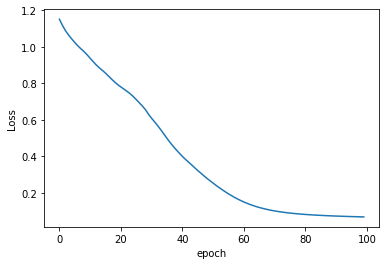

In [40]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epoch');

### Validate the model
Now we run the test set through the model to see if the loss calculation resembles the training data.

In [42]:
correct = 0
# no_grad() say pytorch we are not training based on this data and it's only evaluation
with torch.no_grad():
    for i,data in enumerate(X_test):
        y_val = model.forward(data)
        print(f'{i+1:2}. {str(y_val):38}  {y_test[i]}')
        if y_val.argmax().item() == y_test[i]:
            correct += 1
print(f'\n{correct} out of {len(y_test)} = {100*correct/len(y_test):.2f}% correct')

 1. tensor([-2.1235,  4.8067, -0.8803])     1
 2. tensor([-1.7920,  5.3100, -1.5693])     1
 3. tensor([  6.3723,   0.8741, -10.0971])  0
 4. tensor([-3.9129,  4.5951,  1.1509])     1
 5. tensor([-7.4882,  3.1953,  5.7839])     2
 6. tensor([-10.5202,   1.6381,   9.6291])  2
 7. tensor([  6.3364,   1.0237, -10.1951])  0
 8. tensor([  7.0690,   0.7370, -10.9620])  0
 9. tensor([-7.2218,  3.3422,  5.3528])     2
10. tensor([-9.4170,  2.5675,  8.1028])     2
11. tensor([-9.9029,  2.3388,  8.7141])     2
12. tensor([ 6.2942,  0.6938, -9.8046])     0
13. tensor([-9.3335,  2.1817,  8.1917])     2
14. tensor([-3.7832,  4.5046,  1.0603])     1
15. tensor([-7.8793,  3.0060,  6.2225])     2
16. tensor([-1.8810,  5.1571, -1.3572])     1
17. tensor([-5.7107,  3.5003,  3.6612])     2
18. tensor([  7.2014,   0.7687, -11.1842])  0
19. tensor([-3.2961,  4.7939,  0.3307])     1
20. tensor([-7.7822,  3.7560,  5.7040])     2
21. tensor([  6.6703,   0.8191, -10.4707])  0
22. tensor([  7.4579,   0.9259, -1

### Save the trained model to a file
Right now <strong><tt>model</tt></strong> has been trained and validated, and seems to correctly classify an iris 97% of the time. Let's save this to disk.<br>
The tools we'll use are <a href='https://pytorch.org/docs/stable/torch.html#torch.save'><strong><tt>torch.save()</tt></strong></a> and <a href='https://pytorch.org/docs/stable/torch.html#torch.load'><strong><tt>torch.load()</tt></strong></a><br>

There are two basic ways to save a model.<br>

The first saves/loads the `state_dict` (learned parameters) of the model, but not the model class. The syntax follows:<br>
<tt><strong>Save:</strong>&nbsp;torch.save(model.state_dict(), PATH)<br><br>
<strong>Load:</strong>&nbsp;model = TheModelClass(\*args, \*\*kwargs)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;model.load_state_dict(torch.load(PATH))<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;model.eval()</tt>

The second saves the entire model including its class and parameters as a pickle file. Care must be taken if you want to load this into another notebook to make sure all the target data is brought in properly.<br>
<tt><strong>Save:</strong>&nbsp;torch.save(model, PATH)<br><br>
<strong>Load:</strong>&nbsp;model = torch.load(PATH))<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;model.eval()</tt>

In either method, you must call <tt>model.eval()</tt> to set dropout and batch normalization layers to evaluation mode before running inference. Failing to do this will yield inconsistent inference results.

For more information visit https://pytorch.org/tutorials/beginner/saving_loading_models.html

In [43]:
# Saving data
torch.save(model.state_dict(), 'IrisDatasetModel.pt')

Load a new model: We'll load a new model object and test it as we had before to make sure it worked.

In [44]:
new_model = Model()
new_model.load_state_dict(torch.load('IrisDatasetModel.pt'))
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)

## Adavnced Neural Network model 

In this section we'll combine continuous and categorical data to perform a regression. The goal is to estimate the cost of a New York City cab ride from several inputs. The inspiration behind this code along is a recent <a href='https://www.kaggle.com/c/new-york-city-taxi-fare-prediction'>Kaggle competition</a>.

<div class="alert alert-success"><strong>NOTE:</strong> In this notebook we'll perform a regression with one output value. In the next one we'll perform a binary classification with two output values.</div>

## Working with tabular data
Deep learning with neural networks is often associated with sophisticated image recognition, and in upcoming sections we'll train models based on properties like pixels patterns and colors.

Here we're working with tabular data (spreadsheets, SQL tables, etc.) with columns of values that may or may not be relevant. As it happens, neural networks can learn to make connections we probably wouldn't have developed on our own. However, to do this we have to handle categorical values separately from continuous ones. Make sure to watch the theory lectures! You'll want to be comfortable with:
* continuous vs. categorical values
* embeddings
* batch normalization
* dropout layers